#Introduction to Neural Networks with TensorFlow

In [ ]:
#import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## creating data to view and fit

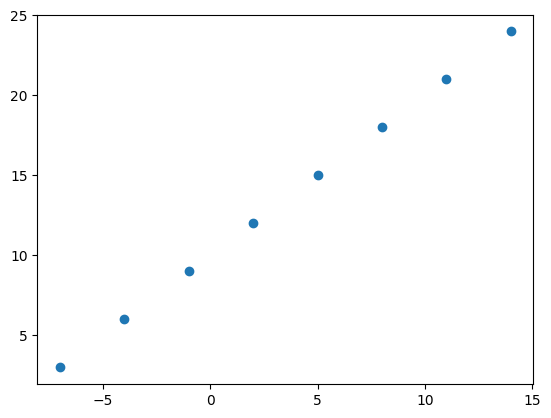

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create feautres
X= np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])

#create labels
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X,y)


In [ ]:
# create a demo tensor for our house price prediction model
house_info= tf.constant(["bedroom", "bathroom", "garage"])
house_price= tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]


(-7.0, 3.0)

In [ ]:
input_shape= X[0].shape
output_shape= y[0].shape
input_shape, output_shape

((), ())

In [ ]:
#turn our Numpy arrays into tensors
X= tf.cast(tf.constant(X), dtype= tf.float32)
y= tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
X[0].shape, y[0].shape


(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
1. **creating a model**- define input and output layers, as well as hidden layers of a deep learning model
2. **compiling a model**- define the loss function(how wrong our model is), the optimizer(how to improve our model) and evaluation metrics (what we can use to imterpret the performance of the model)
3. **fit the model**- letting the model to find relationship between X and y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 731ms/step - loss: 13.5386 - mae: 13.5386
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 13.4061 - mae: 13.4061
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 13.2736 - mae: 13.2736
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 13.1411 - mae: 13.1411
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 13.0086 - mae: 13.0086


In [ ]:
# try and make predictions with our model
y_predict= model.predict([11.0])
y_predict

1/1 [==============================] - 0s 137ms/step


array([[1.8535838]], dtype=float32)

## Imporving our model
To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
#rebuilding our model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)

])

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1),y, epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 13.2820 - mae: 13.2820
Epoch 2/200
1/1 [==============================] - 0s 27ms/step - loss: 12.7559 - mae: 12.7559
Epoch 3/200
1/1 [==============================] - 0s 19ms/step - loss: 12.2667 - mae: 12.2667
Epoch 4/200
1/1 [==============================] - 0s 26ms/step - loss: 11.7925 - mae: 11.7925
Epoch 5/200
1/1 [==============================] - 0s 22ms/step - loss: 11.3207 - mae: 11.3207
Epoch 6/200
1/1 [==============================] - 0s 20ms/step - loss: 10.8695 - mae: 10.8695
Epoch 7/200
1/1 [==============================] - 0s 51ms/step - loss: 10.4103 - mae: 10.4103
Epoch 8/200
1/1 [==============================] - 0s 45ms/step - loss: 9.9458 - mae: 9.9458
Epoch 9/200
1/1 [==============================] - 0s 33ms/step - loss: 9.4960 - mae: 9.4960
Epoch 10/200
1/1 [==============================] - 0s 35ms/step - loss: 9.0705 - mae: 9.0705
Epoch 11/200
1/1 [==============================] - 0s 33

In [ ]:
y_pred= model.predict([1.0])
y_pred

1/1 [==============================] - 0s 203ms/step


array([[10.746579]], dtype=float32)

## Evaluating our model
A typical workflow you'll go through when building neural networks is:

'''
  Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
'''

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

# Visualize, visualize, visualize
When it comes to evaluation, you'll want to remember the words:
# "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

* The data - what data are you working with? What does it look like?
* The model itself - what does the architecture look like? What are the different shapes?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
#make a bigger dataset
X= tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

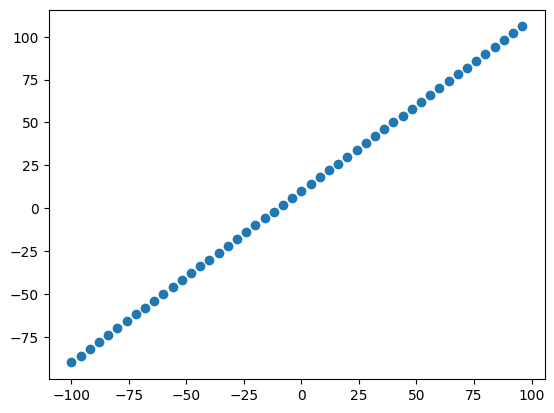

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets......
* **Training set** - the model learns from this dataset(70-80% available data)
* **Validation set** - model gets tuned on this data(10-15% data available)
* **Test set** - the model gets evaluated on this data to test what it has learned.(10-15% data available)

In [ ]:
# check the length of how many samples we have
len(X)

50

In [ ]:
#split the dataset into training set and testing set
X_train= X[:40] #first 40 are training samples(80% of data)
y_train= X[:40]

X_test= X[40:] #last 10 are testing samples(20% of data)
y_test=X[40:]
len(X_train), len(X_test)

(40, 10)

### Visualizing our Data
we have created the training and testing sets, now let us visualize it!

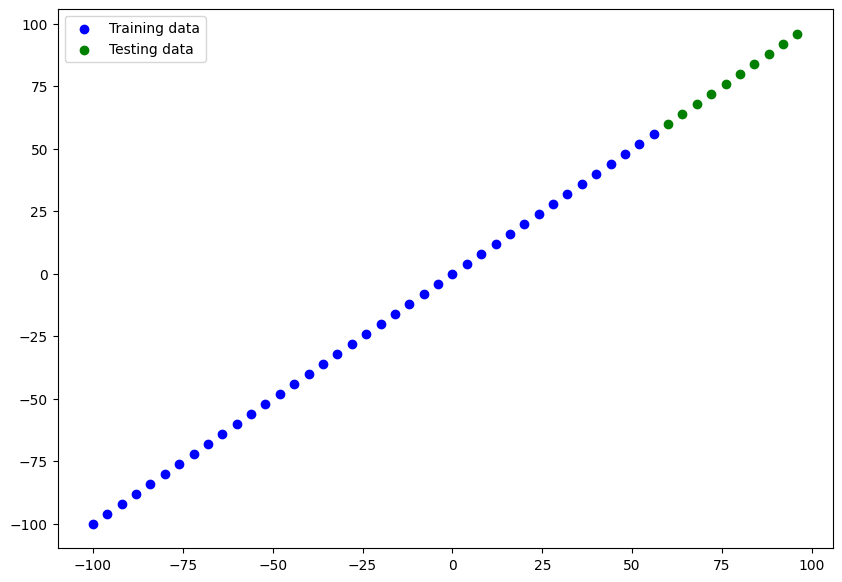

In [ ]:
plt.figure(figsize=(10,7))
#plot training set in blue
plt.scatter(X_train,y_train, c="b", label="Training data")
#plot testing set in green
plt.scatter(X_test,y_test,c="g",label="Testing data")
#show legend
plt.legend();

In [ ]:
#let's have a look at how to build a neural network for our data
# 1. create a model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2.compile model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3.fit the model
#model.fit(X_train, y_train, epochs=100,verbose=0)


### Visualizing our model


In [ ]:
model.summary()
#you need to build the model before using this method

In [ ]:
#model that builds automatically by defining the input_shape argument
tf.random.set_seed(42)
model= tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=[1], name="input_layer_01"),
    tf.keras.layers.Dense(5, input_shape=[1], name="input_layer_02"),
    tf.keras.layers.Dense(5, input_shape=[1], name="input_layer_03"),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_1")
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_01 (Dense)      (None, 5)                 10        
                                                                 
 input_layer_02 (Dense)      (None, 5)                 30        
                                                                 
 input_layer_03 (Dense)      (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* total params- total no. of parametres in the model.
* trainable params- parametres/patterns our model can train or update
* non-trainable params- these parametres are not updated during training(this is typical when you bring in already larned patterns or parametres from other models during **transfer learning**)


In [ ]:
# let's fit our model to the training data
model.fit(X_train,y_train, epochs=500, verbose=0)

In [ ]:
#get summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_01 (Dense)      (None, 5)                 10        
                                                                 
 input_layer_02 (Dense)      (None, 5)                 30        
                                                                 
 input_layer_03 (Dense)      (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


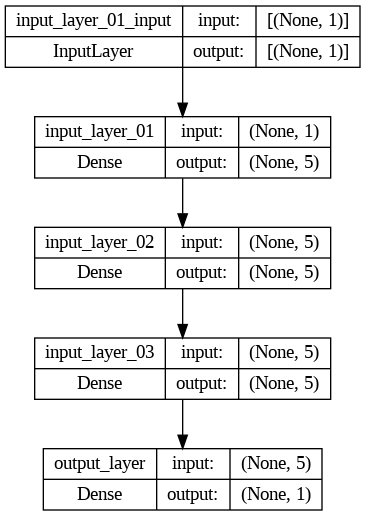

In [ ]:
#plot our model
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)


### Visualizing our Model's predcitions
to visualize models, it's a good idea to plot them against ground truth
ie "y_test" or "y_true" vs "y_pred"

In [ ]:
#make some predictions
y_pred= model.predict(X_test)
y_pred

1/1 [==============================] - 0s 71ms/step


array([[60.02871 ],
       [64.03048 ],
       [68.03225 ],
       [72.03401 ],
       [76.03577 ],
       [80.037544],
       [84.039314],
       [88.04108 ],
       [92.04283 ],
       [96.04461 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  #plot traning data in blue
  plt.scatter(train_data,train_labels, c="b", label="Training data")
  #plot testing data in green
  plt.scatter(test_data,test_labels, c="g",label="Testing data")
  #plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  #show the legend
  plt.legend();


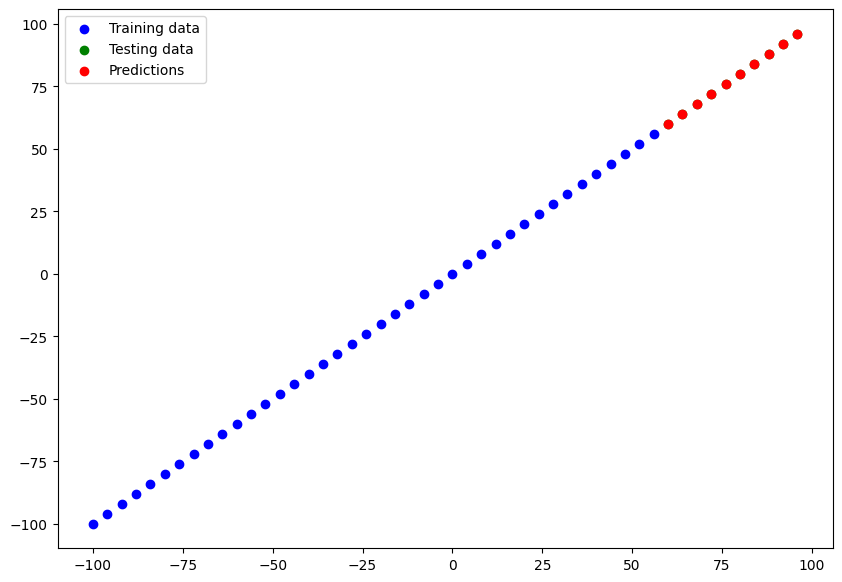

In [ ]:
plot_predictions()

###Evaluating our model's predictions with regression evaluation metrics
Depending on the problem we are working on, there can be different types of evaluation metrics.
* for regression, two major metrics for evaluation is:
* MAE- Mean Absolute Error "on average, how wrong is each of my model's predictions"
* MSE- Mean Square Error "square the avg errors"


In [ ]:
#evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 183ms/step - loss: 0.0367 - mae: 0.0367


[0.03665962070226669, 0.03665962070226669]

In [ ]:
#calculate the mean absolute error
tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.977032, 14.781713, 12.3871  , 10.793198, 10.      , 10.007509,
       10.815725, 12.424646, 14.834265, 18.04461 ], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[60.02871 ],
       [64.03048 ],
       [68.03225 ],
       [72.03401 ],
       [76.03577 ],
       [80.037544],
       [84.039314],
       [88.04108 ],
       [92.04283 ],
       [96.04461 ]], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([60.02871 , 64.03048 , 68.03225 , 72.03401 , 76.03577 , 80.037544,
       84.039314, 88.04108 , 92.04283 , 96.04461 ], dtype=float32)>

In [ ]:
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.03665924>

In [ ]:
#Mean Square Error
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0013696282>

In [ ]:
# Make some functions for MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))


### Running experiments on the model
* get more data
* make the model larger (more complex)
* train longer

tweak the model:
* increase layers
* increase epochs
* mae, mse

### Model-1
1 layer, trained for 100 epochs

In [ ]:
#create a model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1], name="output_layer")
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X_train,y_train, epochs=100,verbose=0)

In [ ]:
y_pred_1= model.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 46ms/step


array([[34.354923],
       [36.644814],
       [38.934704],
       [41.224594],
       [43.514484],
       [45.804375],
       [48.09427 ],
       [50.38416 ],
       [52.67405 ],
       [54.96394 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [ ]:
mae_1= mae(y_test,y_pred_1)
mse_1= mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=33.34057>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1135.7205>)

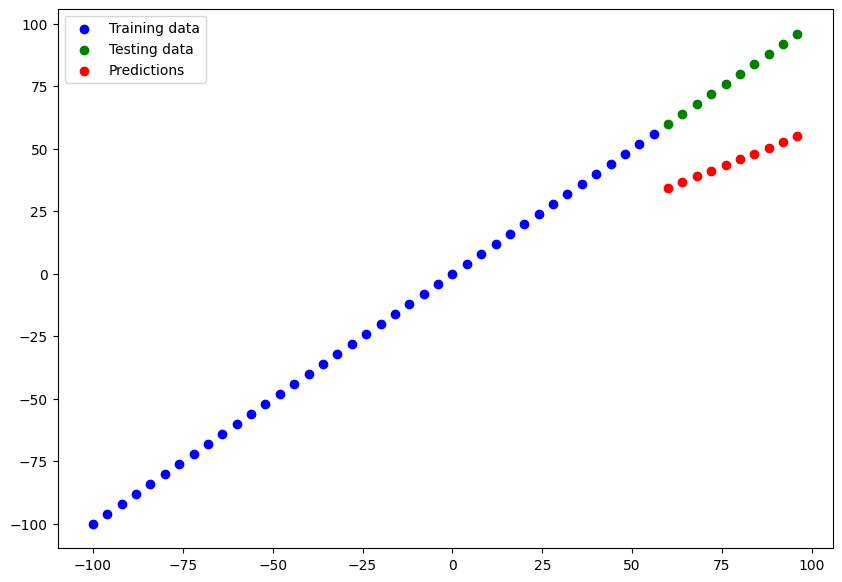

In [ ]:
plot_predictions(predictions=y_pred_1)

### Model2
2 layers and 100 epochs


In [ ]:
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layers"),
    tf.keras.layers.Dense(1,input_shape=[1], name="output_layers")
])
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model_2.fit(X_train,y_train,epochs=100, verbose=0)


In [ ]:
y_pred_2=model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 284ms/step


array([[ 67.24737 ],
       [ 71.73936 ],
       [ 76.231346],
       [ 80.72333 ],
       [ 85.21533 ],
       [ 89.70732 ],
       [ 94.19931 ],
       [ 98.6913  ],
       [103.18328 ],
       [107.67528 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

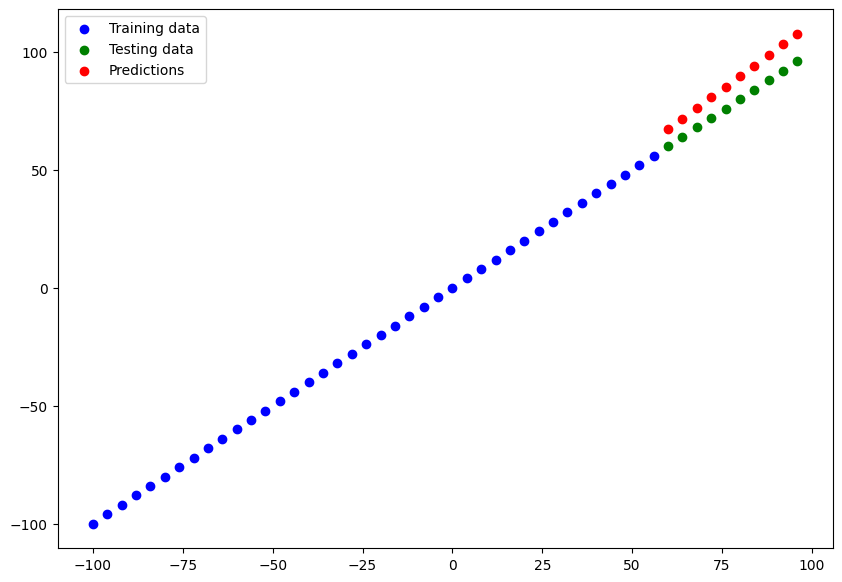

In [ ]:

plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2= mae(y_test,y_pred_2)
mse_2= mse(y_test,y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=9.461322>,
 <tf.Tensor: shape=(), dtype=float32, numpy=91.51356>)

### Model 3
2 layers and 500 epochs

In [ ]:


#set random seed
tf.random.set_seed(42)

# create a model
model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1],name="input_layers"),
    tf.keras.layers.Dense(1, input_shape=[1], name="output_layers")
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])
model_3.fit(X_train,y_train,epochs=500, verbose=0)

In [ ]:
y_pred_3= model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 1s 1s/step


array([[60.003593],
       [64.0038  ],
       [68.004   ],
       [72.004196],
       [76.00439 ],
       [80.004585],
       [84.00478 ],
       [88.00498 ],
       [92.00518 ],
       [96.00539 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [ ]:
mae_3= mae(y_test,y_pred_3)
mse_3= mse(y_test,y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.004489136>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0476069e-05>)

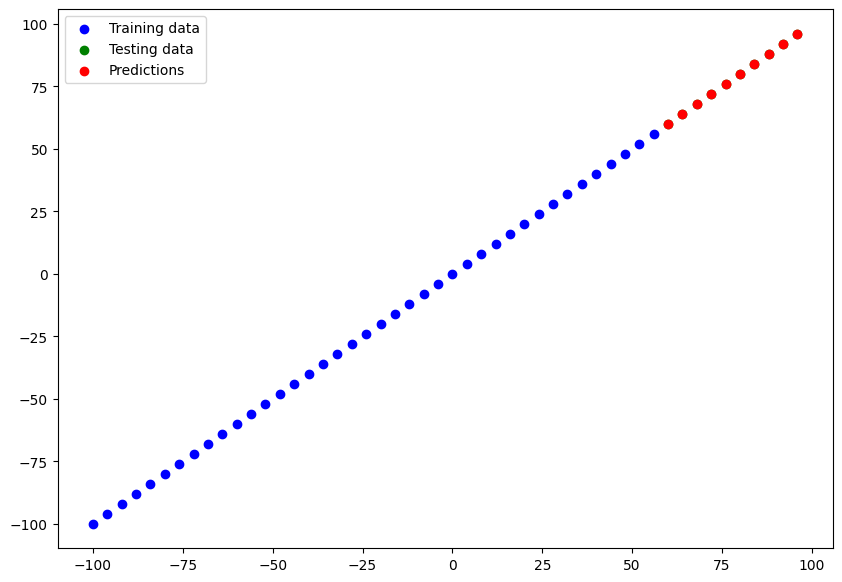

In [ ]:
plot_predictions(predictions= y_pred_3)

## Comparing the results of our model

We have run a few experiments, let's see by comparing their results

In [ ]:
# Let's compare our models result using pandas Dataframe
import pandas as pd
model_results= [["model_1",mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results= pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results


,model,mae,mse
0,model_1,33.340569,1135.720459
1,model_2,9.461322,91.513557
2,model_3,0.004489,0.000020


### Tracking results of your experiments
a good practice to do. But can be tedious if running a lot of experiments
tools which can be helpful:
* TensorBoard: a tensorflow library which helps in tracking exps
* Weights and Biases: a tool for tracking all kinds of experiments

## Saving our Models
saving models help us to use our trained models outside Colab such as web application or mobile application
* there are two main formats in which we can  save our model:
1. SavedModel format
2. the HDF5 format

In [ ]:
# saving the model using SavedModel format
model_3.save("best_model_SavedModel_format")

In [ ]:
#saving the model using HDF5 format
model.save("best_model_HDF5_format.h5")

## Loading a saved model

In [ ]:
#loading the SavedModel format model
Loaded_model= tf.keras.models.load_model("best_model_SavedModel_format")
Loaded_model.summary()

In [ ]:
model_3.summary()

In [ ]:
model_3_preds= model_3.predict(X_test)
Loaded_model_preds= Loaded_model.predict(X_test)
model_3_preds == Loaded_model_preds

## Download a model (or any other file) from Google Colab

* you can go to the "files" tab and right click on the tab on the file you're after and click "download"
* code (see the cell below)
* Saving it on google drive by connecting your drive and copying it there

In [ ]:
# Download a fil from google colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

# A larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
## read in the insurance dataset
insurance= pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encoding our dataframe
insurance_one_hot= pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# create X and Y (features and labels)
X= insurance_one_hot.drop("charges", axis=1)
y= insurance_one_hot["charges"]

In [ ]:
#view X and y
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 1)                 2         
                                                                 
 output_layers (Dense)       (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# build a neural network
tf.random.set_seed(42)
# 1. create a model
insurance_model= tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2.compile the model
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics=["mae"])
#fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8547.8350 - mae: 8547.8350
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7872.6167 - mae: 7872.6167
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7577.1768 - mae: 7577.1768
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7700.3052 - mae: 7700.3052
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7683.3530 - mae: 7683.3530
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7645.3008 - mae: 7645.3008
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7530.3384 - mae: 7530.3384
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7738.9580 - mae: 7738.9580
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7608.7983 - mae: 7608.7983
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7697.9668 - mae: 7697.9668

In [ ]:
#check the results on the test data of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7154.1860 - mae: 7154.1860


[7154.18603515625, 7154.18603515625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### Improving our model

In [ ]:
#improving our model
tf.random.set_seed(42)
callback= tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=["mae"])
history= insurance_model_1.fit(X_train, y_train, epochs=500, callbacks=[callback])


Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 13094.2744 - mae: 13094.2744
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 11240.0732 - mae: 11240.0732
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 7721.5161 - mae: 7721.5161
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 7400.4414 - mae: 7400.4414
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 7320.1685 - mae: 7320.1685
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 7259.4160 - mae: 7259.4160
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 7183.6533 - mae: 7183.6533
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 7108.3706 - mae: 7108.3706
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 7028.9648 - mae: 7028.9648
Epoch 10/500
34/34 [==============================] - 0s 4ms/step - loss: 6947.7119 - mae: 6947.

In [ ]:
insurance_model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3316.0186 - mae: 3316.0186


[3316.0185546875, 3316.0185546875]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 12ms/step - loss: 7154.1860 - mae: 7154.1860


[7154.18603515625, 7154.18603515625]

Text(0.5, 0, 'epochs')

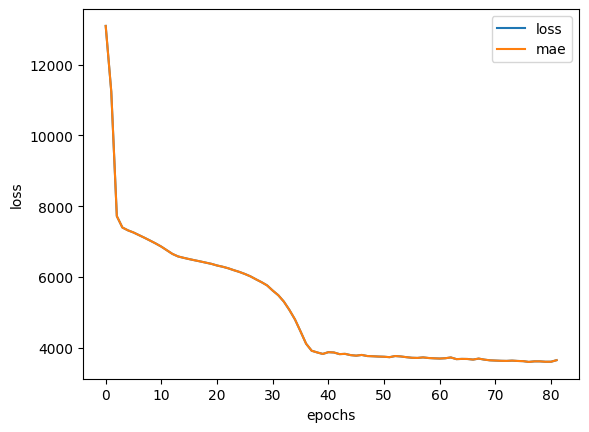

In [ ]:
# let us plot history(also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)

In [ ]:
#importing the libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

#reading the insurance dataframe
insurance= pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


to prepare our data , we use a few classes from Sci-kit Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#create a column transofrmer
ct= make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # converts all values in  the columns b/w 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)
#create X and y
X= insurance.drop("charges", axis=1)
y= insurance["charges"]

#build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# Tranform training and test data with Normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal= ct.transform(X_test)


In [ ]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#shapes of our data
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! our data has been normalized and one hot encoded. Now let's build a nerual network model on our normalized data

In [ ]:
# build our model
tf.random.set_seed(42)
#create a model
insurance_model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
#compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mae"])
#fit the model
insurance_model_2.fit(X_train_normal, y_train, epochs=500, verbose=0)


In [ ]:
# evaluate the model
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.1731 - mae: 3171.1731


[3171.173095703125, 3171.173095703125]